In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [186]:
data = sm.datasets.co2.load()
df = pd.DataFrame(data.data)
df['date'] = pd.to_numeric(df['date'])
#df['date']= pd.to_datetime(df['date'] )
df['co2'] = df['co2'].fillna(df['co2'].bfill())
df['DateTime'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

In [243]:
#df['co2'].plot(figsize=(15, 6))
#plt.show()

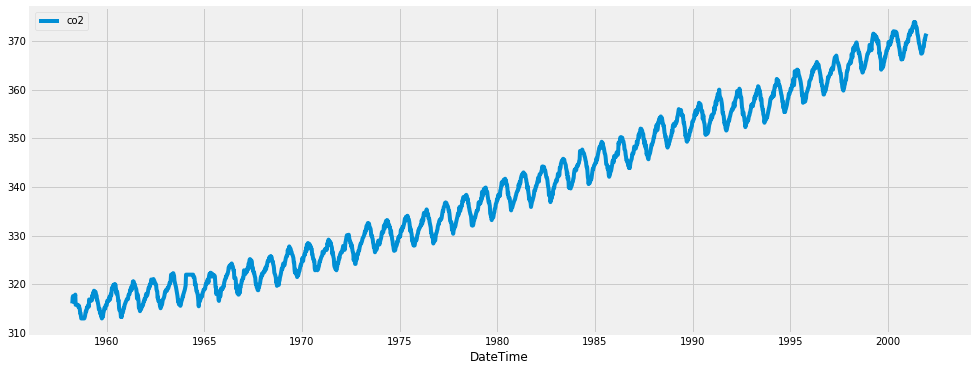

In [196]:
#df['co2'].plot()
df.plot('DateTime','co2',figsize=(15, 6))  

In [197]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [198]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
              mod = sm.tsa.statespace.SARIMAX(df['co2'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

              results = mod.fit()

              print('ARIMA',param,'x12',param_seasonal, 'AIC:', results.aic)
    else:
      print("hello2")
                       

ARIMA (0, 0, 0) x12 (0, 0, 0, 12) AIC: 33097.1538360298
ARIMA (0, 0, 0) x12 (0, 0, 1, 12) AIC: 29854.015682626785
ARIMA (0, 0, 0) x12 (0, 1, 0, 12) AIC: 11289.003377428866
ARIMA (0, 0, 0) x12 (0, 1, 1, 12) AIC: 10788.06071326185
ARIMA (0, 0, 0) x12 (1, 0, 0, 12) AIC: 11275.275426220165
ARIMA (0, 0, 0) x12 (1, 0, 1, 12) AIC: 10555.235327624003
ARIMA (0, 0, 0) x12 (1, 1, 0, 12) AIC: 11240.462958041244
ARIMA (0, 0, 0) x12 (1, 1, 1, 12) AIC: 10713.873185316543
hello2
ARIMA (0, 0, 1) x12 (0, 0, 0, 12) AIC: 29930.529385596143
ARIMA (0, 0, 1) x12 (0, 0, 1, 12) AIC: 26704.855623048246
ARIMA (0, 0, 1) x12 (0, 1, 0, 12) AIC: 8675.568428613216
ARIMA (0, 0, 1) x12 (0, 1, 1, 12) AIC: 8185.515926767478
ARIMA (0, 0, 1) x12 (1, 0, 0, 12) AIC: 11340.203020165141
ARIMA (0, 0, 1) x12 (1, 0, 1, 12) AIC: 8027.961749253083
ARIMA (0, 0, 1) x12 (1, 1, 0, 12) AIC: 8635.931547669326
ARIMA (0, 0, 1) x12 (1, 1, 1, 12) AIC: 8112.907525801411
hello2
ARIMA (0, 1, 0) x12 (0, 0, 0, 12) AIC: 3277.0865147078594
ARIMA (0

In [185]:
df

,date,co2,DateTime
0,19580329,316.1,1958-03-29
1,19580405,317.3,1958-04-05
2,19580412,317.6,1958-04-12
3,19580419,317.5,1958-04-19
4,19580426,316.4,1958-04-26
5,19580503,316.9,1958-05-03
6,19580510,317.5,1958-05-10
7,19580517,317.5,1958-05-17
8,19580524,317.9,1958-05-24
9,19580531,315.8,1958-05-31


In [340]:
dfmonthly = pd.DataFrame( df['DateTime'])
dfmonthly['co2'] = df['co2'] 
dfmonthly.head()

,DateTime,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [341]:
dfmonthly.index = pd.to_datetime(dfmonthly['DateTime'], unit='D')
dfmonthly = dfmonthly.resample('M').mean()

In [240]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
              mod = sm.tsa.statespace.SARIMAX(dfmonthly['co2'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

              results = mod.fit()

              print('ARIMA',param,'x12',param_seasonal, 'AIC:', results.aic)
    else:
      print("Ishikawa")

ARIMA (0, 0, 0) x12 (0, 0, 0, 12) AIC: 7612.577300304358
ARIMA (0, 0, 0) x12 (0, 0, 1, 12) AIC: 6787.3538944747315
ARIMA (0, 0, 0) x12 (0, 1, 0, 12) AIC: 1854.5529883366798
ARIMA (0, 0, 0) x12 (0, 1, 1, 12) AIC: 1593.6859335420809
ARIMA (0, 0, 0) x12 (1, 0, 0, 12) AIC: 1051.4507518592222
ARIMA (0, 0, 0) x12 (1, 0, 1, 12) AIC: 1049.0196319554993
ARIMA (0, 0, 0) x12 (1, 1, 0, 12) AIC: 1355.6595717558012
ARIMA (0, 0, 0) x12 (1, 1, 1, 12) AIC: 1038.310110842966
Ishikawa
ARIMA (0, 0, 1) x12 (0, 0, 0, 12) AIC: 6881.031244273434
ARIMA (0, 0, 1) x12 (0, 0, 1, 12) AIC: 6072.6656429130035
ARIMA (0, 0, 1) x12 (0, 1, 0, 12) AIC: 1363.0191045760896
ARIMA (0, 0, 1) x12 (0, 1, 1, 12) AIC: 1232.2367782880626
ARIMA (0, 0, 1) x12 (1, 0, 0, 12) AIC: 1100.2265958367516
ARIMA (0, 0, 1) x12 (1, 0, 1, 12) AIC: 757.6048739219275
ARIMA (0, 0, 1) x12 (1, 1, 0, 12) AIC: 1106.5016673485088
ARIMA (0, 0, 1) x12 (1, 1, 1, 12) AIC: 787.499977520071
Ishikawa
ARIMA (0, 1, 0) x12 (0, 0, 0, 12) AIC: 1671.9994947205128
AR

### Find out why small discrepancy between the results here and the one previously obtained. 

In [241]:
mod = sm.tsa.statespace.SARIMAX(dfmonthly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3851      0.094      4.099      0.000       0.201       0.569
ma.L1         -0.6554      0.078     -8.380      0.000      -0.809      -0.502
ar.S.L12      -0.0008      0.000     -1.920      0.055      -0.002    1.59e-05
ma.S.L12      -0.8780      0.025    -34.716      0.000      -0.928      -0.828
sigma2         0.0924      0.005     17.438      0.000       0.082       0.103


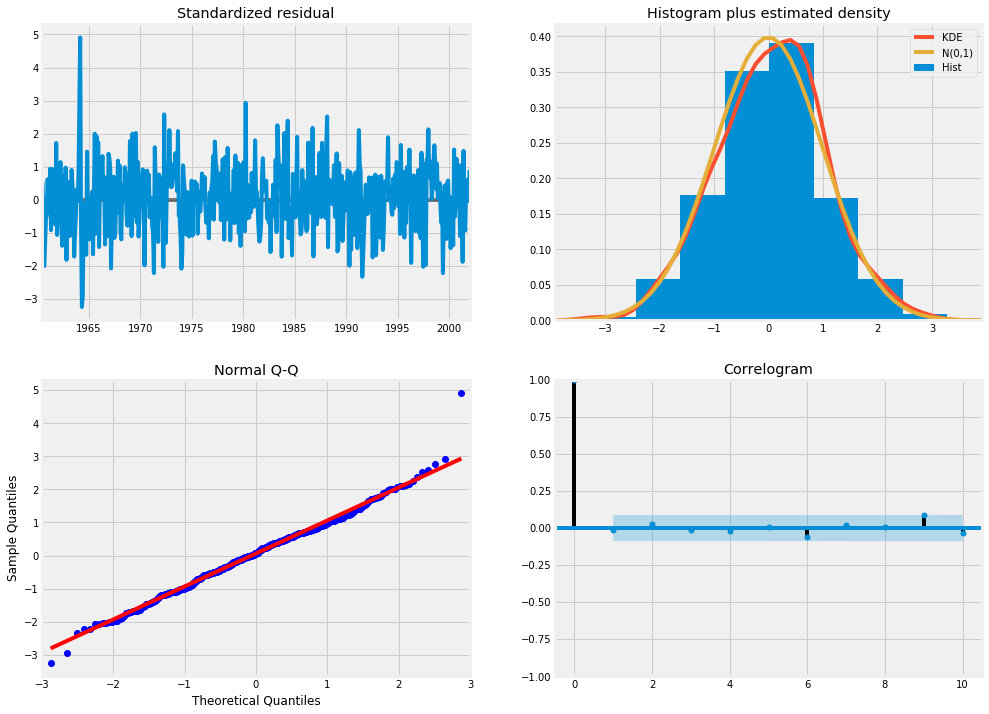

In [242]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [276]:
pred = results.get_prediction(start='1998-03-31', end='2001-12-31', dynamic= False)
pred_ci = pred.conf_int()
 

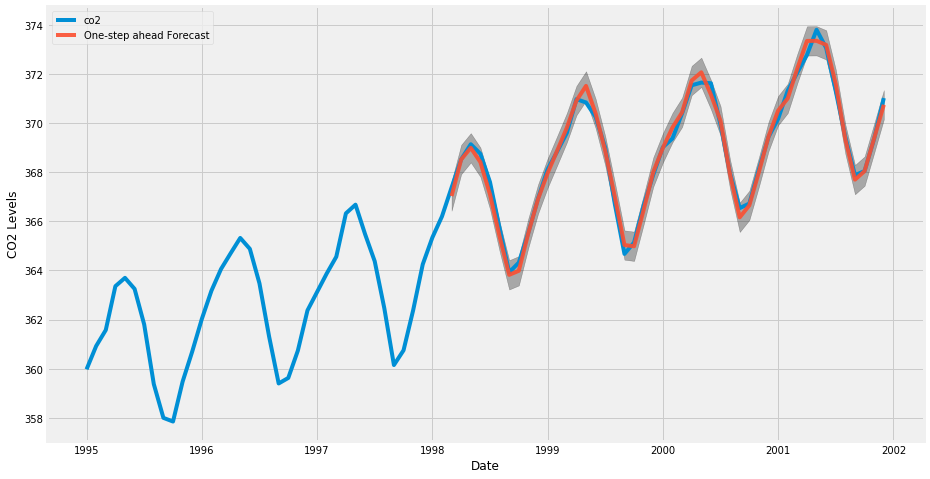

In [301]:
ax = dfmonthly['1995':].plot(label='observed', figsize =(14,8))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [383]:
dfpred = pd.DataFrame(pred_ci)
dfmonthlypred = pd.concat([dfmonthly['1998-03-31' :] , dfpred], axis =1 )
sqerr = (dfmonthlypred['co2'] - dfmonthlypred['pred_mean'])**2
print("The mean squared error of the predictions are: ",sqerr.mean())
print("The root mean squared error of the predictions are: ", sqerr.std()) 

The mean squared error of the predictions are:  0.07347284187972047
The root mean squared error of the predictions are:  0.09733378939605129


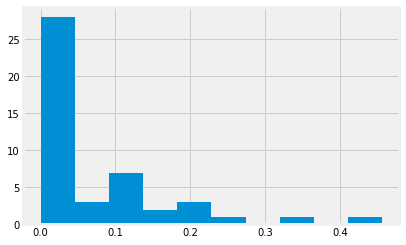

In [394]:
sqerr.hist()
#plt.plot(np.log(sqerr+1)) 

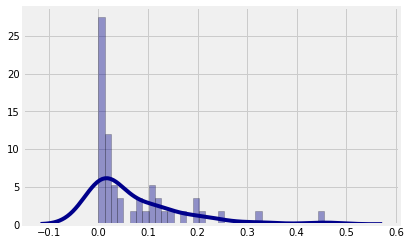

In [389]:
# Density Plot and Histogram of all arrival delays
import seaborn as sns
sns.distplot(sqerr, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


### Does it make sense ?